## KNN

In [4]:
import numpy as np
from statistics import mode

In [5]:
class KNN:
    def __init__(self,kval):
        self.kval= kval
        self.x=None
        self.y= None
    def fit(self,x,y):
        self.x=x
        self.y=y
    def predict(self,x):
        pred=[]
        for i in x:
            pred.append(self._predict(i))
        return pred
    def _predict(self,x):
        dist= np.array([np.linalg.norm(x-i) for i in self.x])
        indices= np.argsort(dist)[:self.kval]
        neigh=[]
        for i in range(self.kval):
            neigh.append(self.y[indices[i]])
        return mode(neigh)             

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def metrics(actual,predicted):
    tp=0
    tn=0
    fp=0
    fn=0
    for i in range(len(actual)):
        if(actual[i] == 1 and predicted[i]==1):
            tp+=1
        elif(actual[i] == 1 and predicted[i]==0):
            fn+=1
        elif(actual[i] == 0 and predicted[i]==1):
            fp+=1  
        else:
            tn+=1
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    precision=(tp)/(tp+fp)
    recall= (tp)/(tp+fn)
    f1=(2*precision*recall)/(precision+recall)
    print("accuracy= ",accuracy)
    print("precision= ", precision)
    print("recall= ", recall)
    print("f1= ",f1)
    cfm= np.array([[tp,fn],[fp,fn]])
    sns.heatmap(cfm,annot=True)
          

In [8]:
import pandas as pd
df= pd.read_csv('Iris.csv')

In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
np.unique(df["Species"])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
df= df.replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})

In [33]:
X= df.drop(columns=["Species"])
Y= df["Species"]

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test= train_test_split(X,Y)

In [39]:
x_train= np.array(x_train)
y_train= np.array(y_train)
x_test= np.array(x_test)

In [42]:
cls= KNN(3)
cls.fit(x_train,y_train)
cls.predict(x_test)

[1,
 1,
 1,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 3,
 1,
 2,
 1,
 3,
 2,
 3,
 3,
 3,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 1,
 2,
 2,
 1,
 2,
 1,
 3]

accuracy=  0.5
precision=  0.5
recall=  1.0
f1=  0.6666666666666666


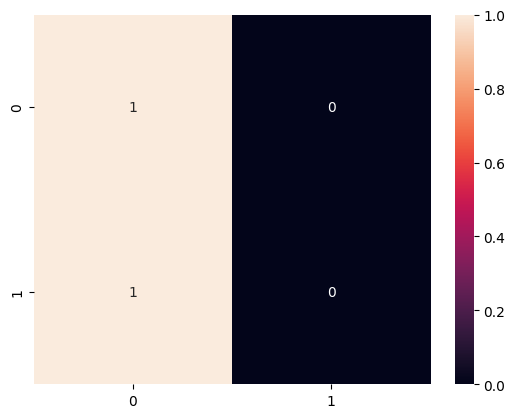

In [11]:
X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y_train = np.array([0, 0, 1, 1])
X_test = np.array([[5, 6], [6, 7]])
clf = KNN(3)
actual=np.array([0,1])
clf.fit(X_train,y_train)
clf.predict(X_test)
metrics(actual,clf.predict(X_test))